In [1]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
ImageDataGen = ImageDataGenerator(rotation_range=10,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 rescale=1/255,
                                 shear_range=0,
                                 zoom_range=0.05,
                                 horizontal_flip=False,
                                 fill_mode='nearest',
                                 validation_split=0.3)

In [3]:
input_size = (50,50,3)
train_Images_gen = ImageDataGen.flow_from_directory('../../Train',batch_size=15,target_size=input_size[:2],class_mode='categorical',subset='training')

Found 27447 images belonging to 43 classes.


In [4]:
test_Images_gen = ImageDataGen.flow_from_directory('../../Train',batch_size=15,target_size=input_size[:2],class_mode='categorical',subset='validation')

Found 11762 images belonging to 43 classes.


In [21]:
train_Images_gen.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '5': 38,
 '6': 39,
 '7': 40,
 '8': 41,
 '9': 42}

In [5]:
classification_classes = 43
train_Images_gen.class_indices
print(type(train_Images_gen))

<class 'keras_preprocessing.image.directory_iterator.DirectoryIterator'>


In [13]:
model = Sequential()
model.add(Conv2D(filters=32,activation='relu',input_shape=input_size,kernel_size=(4,4)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,activation='relu',kernel_size=(4,4)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(classification_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [14]:
results = model.fit_generator(train_Images_gen,epochs=20,steps_per_epoch=300,
                              validation_data = test_Images_gen,
                              validation_steps = 200)

Epoch 1/20
300/300 [==============================] - 200s 665ms/step - loss: 2.7858 - acc: 0.2558 - val_loss: 2.1749 - val_acc: 0.3910
Epoch 2/20
300/300 [==============================] - 179s 596ms/step - loss: 1.7376 - acc: 0.4884 - val_loss: 1.7687 - val_acc: 0.4877
Epoch 3/20
300/300 [==============================] - 192s 641ms/step - loss: 1.2155 - acc: 0.6162 - val_loss: 1.3238 - val_acc: 0.5970
Epoch 4/20
300/300 [==============================] - 225s 750ms/step - loss: 0.9687 - acc: 0.7009 - val_loss: 1.2570 - val_acc: 0.6260
Epoch 5/20
300/300 [==============================] - 208s 692ms/step - loss: 0.7990 - acc: 0.7467 - val_loss: 1.0612 - val_acc: 0.6933
Epoch 6/20
300/300 [==============================] - 205s 682ms/step - loss: 0.6530 - acc: 0.7904 - val_loss: 0.9985 - val_acc: 0.7260
Epoch 7/20
300/300 [==============================] - 277s 924ms/step - loss: 0.5779 - acc: 0.8156 - val_loss: 1.0128 - val_acc: 0.7097
Epoch 8/20
300/300 [============================

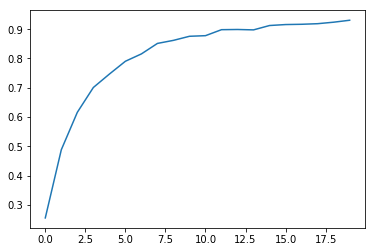

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['acc'])